In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [2]:
import prepare
import loaders
import evaluators


In [3]:
prepare.prepare_clip()
prepare.prepare_aero()
prepare.prepare_structure()
prepare.prepare_validity()

✅ CLIP_X_train.csv already exists in datasets folder. Skipping download.
✅ CLIP_Y_train.npy already exists in datasets folder. Skipping download.


In [25]:
# X_train, Y_train, X_test = loaders.load_aero()
# X_train, Y_train, X_test = loaders.load_structure()
X_train, Y_train, X_test = loaders.load_clip()
# X_train, Y_train, X_test = loaders.load_validity()

✅ CLIP_X_train.csv already exists in datasets folder. Skipping download.
✅ CLIP_Y_train.npy already exists in datasets folder. Skipping download.


In [4]:
X_test

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,BB diameter,...,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,BELTorCHAIN OHCLASS: 0,BELTorCHAIN OHCLASS: 1,RIM_STYLE front OHCLASS: DISC,RIM_STYLE front OHCLASS: SPOKED,RIM_STYLE front OHCLASS: TRISPOKE,RIM_STYLE rear OHCLASS: DISC,RIM_STYLE rear OHCLASS: SPOKED,RIM_STYLE rear OHCLASS: TRISPOKE
1,430.00,67.000000,565.6,73.000000,135.6,45.0,588.7,72.500000,664.020690,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,350.00,-14.500000,565.6,71.500000,80.0,45.0,265.0,71.500000,572.491950,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,415.00,4.000000,565.6,72.000000,198.8,45.0,562.0,74.000000,647.103654,38.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,375.00,50.000000,565.6,70.500000,91.8,40.0,460.0,73.500000,573.904093,38.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,431.79,24.000000,565.6,72.100000,83.1,41.0,300.0,72.500000,636.179297,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,410.00,75.000000,552.0,72.500000,145.0,125.0,520.0,74.000000,644.551458,40.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4797,419.00,42.909345,598.9,65.772099,95.0,90.0,380.0,77.772099,704.278730,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4798,410.00,-11.500000,492.5,72.000000,250.0,45.0,550.0,74.000000,547.934671,40.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4799,410.00,-11.500000,500.0,72.000000,280.4,45.0,550.0,74.000532,542.387502,40.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X_train

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,BB diameter,...,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,BELTorCHAIN OHCLASS: 0,BELTorCHAIN OHCLASS: 1,RIM_STYLE front OHCLASS: DISC,RIM_STYLE front OHCLASS: SPOKED,RIM_STYLE front OHCLASS: TRISPOKE,RIM_STYLE rear OHCLASS: DISC,RIM_STYLE rear OHCLASS: SPOKED,RIM_STYLE rear OHCLASS: TRISPOKE
0,315.000000,-46.890000,480.000000,62.000000,70.743000,11.300000,198.932000,60.000000,483.253753,34.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,523.010000,26.555000,567.500000,70.250000,169.610500,143.150000,454.178000,70.000002,632.584331,47.00000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
2,445.006250,-19.348125,534.687500,71.281250,256.119563,126.668750,230.837750,61.250000,501.920075,58.37500,...,0.687500,0.937500,0.187500,0.312500,0.187500,0.437500,0.937500,0.687500,0.812500,0.187500
3,562.011875,95.409688,649.531250,64.578125,225.223469,134.909375,214.884875,66.875001,772.581748,51.06250,...,0.281250,0.968750,0.906250,0.593750,0.031250,0.156250,0.593750,0.718750,0.281250,0.718750
4,666.016875,-14.757813,518.281250,76.953125,175.789719,68.984375,597.753875,61.875000,697.916459,57.56250,...,0.031250,0.218750,0.156250,0.843750,0.781250,0.406250,0.343750,0.468750,0.031250,0.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398145,464.507212,32.868912,601.225123,65.729073,263.112988,129.956069,413.105572,70.629891,587.253876,34.19243,...,0.078127,0.746280,0.759097,0.867194,0.052312,0.260488,0.306426,0.429703,0.338611,0.670212
1398146,594.513462,42.049537,480.912623,62.635323,201.320801,245.324819,381.199822,74.379892,605.920198,48.81743,...,0.765627,0.183780,0.321597,0.179694,0.614812,0.322988,0.368926,0.242203,0.401111,0.982712
1398147,646.515962,97.133287,590.287623,77.072823,226.037676,212.362319,317.388322,66.879890,643.252843,39.06743,...,0.390627,0.058780,0.696597,0.304694,0.489812,0.947988,0.993926,0.617203,0.276111,0.857712
1398148,562.011900,-42.871244,598.490748,62.893135,247.664941,167.038882,580.610760,68.442391,573.254135,42.72368,...,0.968752,0.793155,0.118472,0.601569,0.880437,0.932363,0.509551,0.257828,0.822986,0.060837


(array([1.06994375e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.64245537e-05, 7.64245537e-05, 5.34971876e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.64245537e-05,
        0.00000000e+00, 1.00192590e-01, 1.52849107e-04, 3.05698215e-04,
        0.00000000e+00, 1.52849107e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.64245537e-05,
        0.00000000e+00, 1.52849107e-04, 2.29273661e-04, 2.23159697e-01,
        9.17094644e-04, 1.06994375e-03, 4.58547322e-04, 7.64245537e-05,
        2.75128393e-03, 1.29921741e-03, 1.68134018e-03, 1.75776473e-03,
        0.00000000e+00, 3.36268036e-03, 5.34971876e-04, 7.64245537e-04,
        7.64245537e-04, 0.00000000e+00, 1.52849107e-04, 0.00000000e+00,
        1.14636831e-03, 0.00000000e+00, 0.00000000e+00, 2.29273661e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

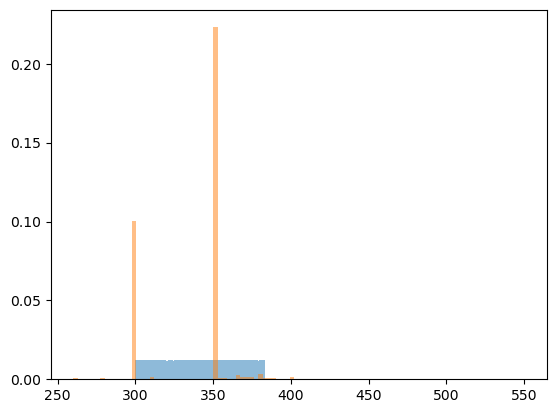

In [48]:
import matplotlib.pyplot as plt

idx = 20
plt.hist(X_train.values[:, idx], bins=100, density=True, alpha=0.5)
plt.hist(X_test.values[:, idx], bins=100, density=True, alpha=0.5)

In [49]:
print(X_train.columns[idx])
print(X_test.columns[idx])
print(X_train[X_train.columns[idx]])
print(X_test[X_test.columns[idx]])

CHAINSTAYbrdgshift
CHAINSTAYbrdgshift
0          300.000000
1          341.500000
2          305.187500
3          318.156250
4          380.406250
              ...    
1398145    302.837503
1398146    339.150003
1398147    328.775003
1398148    337.853128
1398149    379.353128
Name: CHAINSTAYbrdgshift, Length: 1398150, dtype: float64
1       350.0
2       350.0
3       350.0
4       350.0
5       350.0
        ...  
4796    350.0
4797    350.0
4798    350.0
4799    350.0
4800    350.0
Name: CHAINSTAYbrdgshift, Length: 4512, dtype: float64
